Stochastic Gradient Descent: [4.11781825 2.81799996]
Batch Gradient Descent: [4.21509616 2.77011339]
Mini-Batch Gradient Descent: [4.21332121 2.77864043]


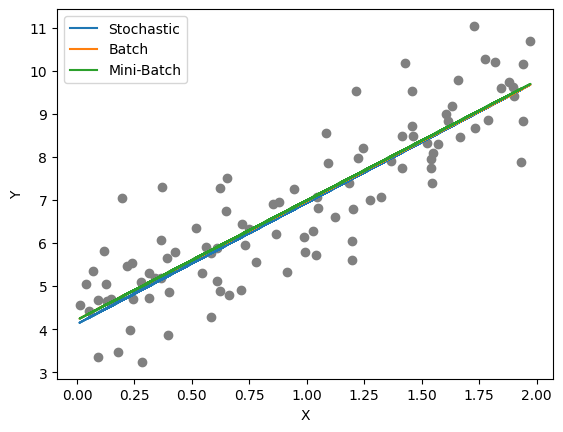

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), x]  # Add bias term

# Initialization for all methods
theta_sgd = np.random.randn(2, 1)
theta_batch = np.random.randn(2, 1)
theta_mini = np.random.randn(2, 1)
eta = 0.1
n_iterations = 5000 #10000
m = 100
batch_size = 20
# Stochastic Gradient Descent
def stochastic_gradient_descent(X_b, y, theta, eta, n_iterations, m):
  for iteration in range(n_iterations):
    for i in range(m):
      random_index = np.random.randint(m)
      xi = X_b[random_index:random_index + 1]
      yi = y[random_index:random_index + 1]
      gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - eta * gradients
  return theta
# Batch Gradient Descent
def batch_gradient_descent(X_b, y, theta, eta, n_iterations):
  for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
  return theta
# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X_b, y, theta, eta, n_iterations, m, batch_size):
  for iteration in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
      xi = X_b_shuffled[i:i+batch_size]
      yi = y_shuffled[i:i+batch_size]
      gradients = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - eta * gradients
  return theta
# Run the optimization functions
theta_sgd = stochastic_gradient_descent(X_b, y, theta_sgd, eta, n_iterations, m)
theta_batch = batch_gradient_descent(X_b, y, theta_batch, eta, n_iterations)
theta_mini = mini_batch_gradient_descent(X_b, y, theta_mini, eta, n_iterations, m, batch_size)
# Print results
print("Stochastic Gradient Descent:", theta_sgd.flatten())
print("Batch Gradient Descent:", theta_batch.flatten())
print("Mini-Batch Gradient Descent:", theta_mini.flatten())

# Plot the results
plt.scatter(x, y, color="grey")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, X_b.dot(theta_sgd), label='Stochastic')
plt.plot(x, X_b.dot(theta_batch), label='Batch')
plt.plot(x, X_b.dot(theta_mini), label='Mini-Batch')
plt.legend()
plt.show()

In [ ]:
theta_momentum = np.random.randn(2, 1)
theta_adagrad = np.random.randn(2, 1)
theta_rmsprop = np.random.randn(2, 1)
eta = 0.1
n_iterations = 10000
m = 100

# Momentum-based Gradient Descent
def momentum_gradient_descent(X_b, y, theta, eta, n_iterations, m, beta=0.9):
  velocity = np.zeros_like(theta)
  for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    velocity = beta * velocity + (1 - beta) * gradients
    theta = theta - eta * velocity
  return theta

# Adagrad
def adagrad(X_b, y, theta, eta, n_iterations, m, epsilon=1e-7):
  s = np.zeros_like(theta)
  for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    s += gradients ** 2
    theta = theta - eta * gradients / (np.sqrt(s) + epsilon)
  return theta

# RMSprop
def rmsprop(X_b, y, theta, eta, n_iterations, m, beta=0.9, epsilon=1e-7):
  s = np.zeros_like(theta)
  for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    s = beta * s + (1 - beta) * gradients ** 2
    theta = theta - eta * gradients / (np.sqrt(s) + epsilon)
  return theta

theta_momentum = momentum_gradient_descent(X_b, y, theta_momentum, eta, n_iterations, m)
theta_adagrad = adagrad(X_b, y, theta_adagrad, eta, n_iterations, m)
theta_rmsprop = rmsprop(X_b, y, theta_rmsprop, eta, n_iterations, m)

# Print results
print("Momentum-based Gradient Descent:", theta_momentum.flatten())
print("Adagrad:", theta_adagrad.flatten())
print("RMSprop:", theta_rmsprop.flatten())